In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan pocas observaciones.

In [20]:
# Directorio de datos
data_dir = 'malimg_paper_dataset_imgs'

In [21]:
familias_malware = os.listdir(data_dir)
familias_malware

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.gen!g',
 'C2LOP.P',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [22]:
# Ejemplares de cada familia
for familia in familias_malware:
    print(f'{familia}: {len(os.listdir(os.path.join(data_dir, familia)))}')

Adialer.C: 122
Agent.FYI: 116
Allaple.A: 2949
Allaple.L: 1591
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.gen!g: 200
C2LOP.P: 146
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 800


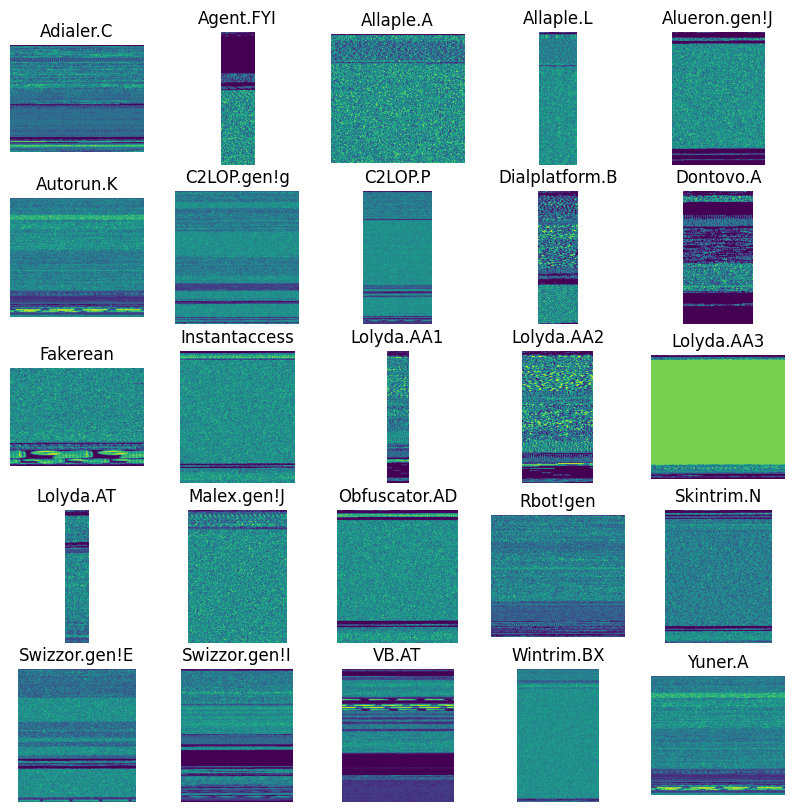

In [23]:
# Plotee las imágenes de los ejemplos de malware
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, familia in enumerate(familias_malware):
    ax[i//5, i%5].imshow(plt.imread(os.path.join(data_dir, familia, os.listdir(os.path.join(data_dir, familia))[0])))
    ax[i//5, i%5].set_title(familia)
    ax[i//5, i%5].axis('off')
plt.show()

In [24]:
img_height, img_width = 64, 64
batch_size = 32
epochs = 50

In [25]:
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
class_indices = data_generator.class_indices
num_classes = len(class_indices)

Found 9339 images belonging to 25 classes.


In [26]:
# Division de datos en entrenamiento y prueba

X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Creación del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [28]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [29]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 3.2318 - accuracy: 0.0455 - val_loss: 2.9979 - val_accuracy: 0.2000
Epoch 2/50
1/1 [==============================] - 0s 89ms/step - loss: 2.8478 - accuracy: 0.3182 - val_loss: 2.9297 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 90ms/step - loss: 2.6738 - accuracy: 0.2727 - val_loss: 2.8898 - val_accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 0s 81ms/step - loss: 2.8070 - accuracy: 0.2727 - val_loss: 2.6982 - val_accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 0s 83ms/step - loss: 2.7423 - accuracy: 0.2273 - val_loss: 2.6283 - val_accuracy: 0.2000
Epoch 6/50
1/1 [==============================] - 0s 87ms/step - loss: 2.6774 - accuracy: 0.1364 - val_loss: 2.6114 - val_accuracy: 0.2000
Epoch 7/50
1/1 [==============================] - 0s 84ms/step - loss: 2.6610 - accuracy: 0.1818 - val_loss: 2.5866 - val_accuracy: 0.2000
Epoch 8/50
1/1 [=============

In [30]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 38ms/step - loss: 1.5689 - accuracy: 0.4000
Loss: 1.5689, Accuracy: 0.4000


In [31]:
# Métricas del modelo
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
unique_labels = np.unique(y_true)
unique_class_names = [list(class_indices.keys())[i] for i in unique_labels]
print(classification_report(y_true, y_pred, labels=unique_labels, target_names=unique_class_names))
print(confusion_matrix(y_true, y_pred, labels=unique_labels))

1/1 [==============================] - 0s 78ms/step
               precision    recall  f1-score   support

    Allaple.A       0.00      0.00      0.00         4
    Allaple.L       0.29      1.00      0.44         2
      C2LOP.P       0.00      0.00      0.00         1
Obfuscator.AD       0.00      0.00      0.00         1
      Yuner.A       1.00      1.00      1.00         2

    micro avg       0.44      0.40      0.42        10
    macro avg       0.26      0.40      0.29        10
 weighted avg       0.26      0.40      0.29        10

[[0 4 0 0 0]
 [0 2 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 2]]


d:\universidad\2023 - primer semestre\SECURITY DATA SCIENCE\lab6\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\universidad\2023 - primer semestre\SECURITY DATA SCIENCE\lab6\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\universidad\2023 - primer semestre\SECURITY DATA SCIENCE\lab6\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t